### ALGORITMA BRANCH AND BOUND
##### Nama : Hafizh Hilman Asyhari
##### NIM : 202331206
##### Tahun : 2025

In [10]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import time
import logging
from IPython.display import clear_output, display
import ipywidgets as widgets
import threading
import numpy as np

logging.basicConfig(level=logging.INFO, format='%(message)s')

In [11]:
class Node:
    def __init__(self, level, path, cost, bound):
        self.level = level
        self.path = path
        self.cost = cost
        self.bound = bound

    def __lt__(self, other):
        return self.bound < other.bound

In [3]:
def calculate_bound(path, dist_matrix):
    n = len(dist_matrix)
    bound = 0
    visited = set(path)

    for i in range(len(path) - 1):
        bound += dist_matrix[path[i]][path[i+1]]

    last = path[-1]
    min_out = float('inf')
    for j in range(n):
        if j not in visited:
            min_out = min(min_out, dist_matrix[last][j])
    bound += min_out if min_out != float('inf') else 0

    for i in range(n):
        if i not in visited:
            min_in = float('inf')
            for j in range(n):
                if j != i and j not in visited:
                    min_in = min(min_in, dist_matrix[i][j])
            bound += min_in if min_in != float('inf') else 0

    return bound

In [21]:
def visualize_graph(path, dist_matrix, step):
    G = nx.DiGraph()
    labels = {}
    n = len(dist_matrix)

    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(n):
            if i != j:
                G.add_edge(i, j, weight=dist_matrix[i][j])
                labels[(i, j)] = dist_matrix[i][j]

    pos = nx.circular_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    if len(path) > 1:
        nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], width=3, edge_color='r')
    plt.title(f"Langkah #{step}: Jalur Sementara")
    plt.show()

In [22]:
def branch_and_bound_tsp(dist_matrix):
    n = len(dist_matrix)
    pq = []
    step = 0
    root = Node(0, [0], 0, calculate_bound([0], dist_matrix))
    heapq.heappush(pq, root)

    min_cost = float('inf')
    best_path = []

    while pq:
        current = heapq.heappop(pq)
        step += 1

        logging.info(f"Langkah {step}: Memeriksa path {current.path} dengan bound = {current.bound}, cost = {current.cost}")
        clear_output(wait=True)
        display(widgets.HTML(value=f"<b>Langkah:</b> {step}, <b>Path:</b> {current.path}, <b>Bound:</b> {current.bound}, <b>Cost:</b> {current.cost}"))
        visualize_graph(current.path, dist_matrix, step)

        if current.bound < min_cost:
            for i in range(n):
                if i not in current.path:
                    new_path = current.path + [i]
                    new_cost = current.cost + dist_matrix[current.path[-1]][i]
                    if len(new_path) == n:
                        new_cost += dist_matrix[i][0]
                        if new_cost < min_cost:
                            min_cost = new_cost
                            best_path = new_path + [0]
                            logging.info(f"\n>> Path baru terbaik ditemukan: {best_path} dengan biaya = {min_cost}\n")
                    else:
                        new_bound = calculate_bound(new_path, dist_matrix)
                        if new_bound < min_cost:
                            new_node = Node(current.level + 1, new_path, new_cost, new_bound)
                            heapq.heappush(pq, new_node)

    return best_path, min_cost

In [23]:
# ===========================
# Pilihan Input Dinamis
# ===========================
def run_tsp(option):
    if option == 'Default (4 Kota)':
        matrix = [
            [0, 10, 15, 20],
            [10, 0, 35, 25],
            [15, 35, 0, 30],
            [20, 25, 30, 0]
        ]
    elif option == 'Kasus 5 Kota':
        matrix = [
            [0, 3, 1, 5, 8],
            [3, 0, 6, 7, 9],
            [1, 6, 0, 4, 2],
            [5, 7, 4, 0, 3],
            [8, 9, 2, 3, 0]
        ]
    elif option == 'Acak 6 Kota':
        rng = np.random.default_rng(0)
        random_matrix = rng.integers(1, 20, size=(6, 6))
        np.fill_diagonal(random_matrix, 0)
        matrix = random_matrix.tolist()

    print("Nama: Hafizh Hilman Asyhari")
    print("Memulai Branch and Bound...")
    start = time.time()
    path, cost = branch_and_bound_tsp(matrix)
    end = time.time()
    print(f"\nPath Optimal: {path}")
    print(f"Total Cost: {cost}")
    print(f"Waktu Eksekusi: {end - start:.4f} detik")

In [15]:
# ===========================
# Pilihan Input Dinamis
# ===========================
def run_tsp(option):
    if option == 'Default (4 Kota)':
        matrix = [
            [0, 10, 15, 20],
            [10, 0, 35, 25],
            [15, 35, 0, 30],
            [20, 25, 30, 0]
        ]
    elif option == 'Kasus 5 Kota':
        matrix = [
            [0, 3, 1, 5, 8],
            [3, 0, 6, 7, 9],
            [1, 6, 0, 4, 2],
            [5, 7, 4, 0, 3],
            [8, 9, 2, 3, 0]
        ]
    elif option == 'Acak 6 Kota':
        rng = np.random.default_rng(0)
        random_matrix = rng.integers(1, 20, size=(6, 6))
        np.fill_diagonal(random_matrix, 0)
        matrix = random_matrix.tolist()

    print("Nama: Hafizh Hilman Asyhari")
    print("Memulai Branch and Bound...")
    start = time.time()
    path, cost = branch_and_bound_tsp(matrix)
    end = time.time()
    print(f"\nPath Optimal: {path}")
    print(f"Total Cost: {cost}")
    print(f"Waktu Eksekusi: {end - start:.4f} detik")

In [24]:
# Widget untuk memilih kasus
options = ['Default (4 Kota)', 'Kasus 5 Kota', 'Acak 6 Kota']
dropdown = widgets.Dropdown(options=options, description='Pilih Kasus:')
button = widgets.Button(description="Jalankan Algoritma")
output = widgets.Output()

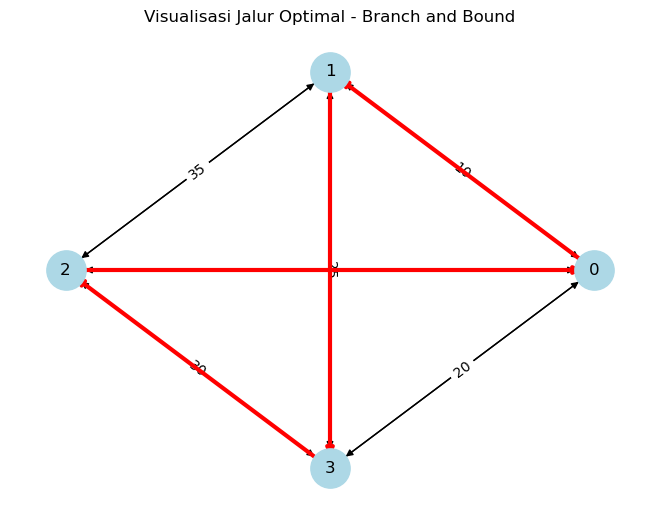

In [9]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], width=3, edge_color='r')
plt.title("Visualisasi Jalur Optimal - Branch and Bound")
plt.show()

In [25]:
ui = widgets.VBox([dropdown, button, output])
display(ui)


In [26]:
def on_button_click(b):
    output.clear_output()
    with output:
        run_tsp(dropdown.value)


In [27]:
button.on_click(on_button_click)